In [2]:
#Dataframe manipulation library
import pandas as pd
import numpy as np


In [3]:
df2 = pd.read_excel('dnd-dataframe.xlsx', sheet_name=0, usecols=['name', 'background'])
df2.head(30)

,name,background
0,bam,"You were poor or feared becoming poor, so you ..."
1,niem,"You took up with a confidence artist, from who..."
2,aem,You ran away from home to follow a minstrel tr...
3,yaeks,"You were left to your own devices, and your kn..."
4,jeeks,An impassioned sermon struck a chord deep in y...
5,aez,"Your family gave you to a temple, since they w..."
6,sax,A parent or one of your relatives was an adven...
7,eert,A mad old hermit spoke a prophecy when you wer...
8,wuc,"You were naturally curious, so you packed up a..."
9,yac,"Necessity forced you to take up the life, sinc..."


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [6]:
dtm = tfidf.fit_transform(df2['background'])

In [7]:
dtm

<29x204 sparse matrix of type '<class 'numpy.float64'>'
	with 764 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.decomposition import NMF

In [9]:
nmf_model = NMF(n_components=7, random_state=42)

In [10]:
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=7, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [11]:
tfidf.get_feature_names()[200]

'working'

In [12]:
for index, topic in enumerate(nmf_model.components_):
    print(f"The Top 15 words Per topic # {index}")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print(f"\n")

The Top 15 words Per topic # 0
['friendly', 'alive', 'relationship', 'works', 'human', 'friend', 'adventurer', 'neutral', 'instantly', 'musical', 'discovered', 'day', 'picked', 'play', 'instrument']


The Top 15 words Per topic # 1
['work', 'good', 'time', 'working', 'spent', 'bring', 'charlatan', 'learned', 'fought', 'needed', 'tricks', 'feared', 'poverty', 'battle', 'poor']


The Top 15 words Per topic # 2
['decided', 'good', 'natural', 'fortune', 'bit', 'gained', 'improving', 'streak', 'lucky', 'realize', 'career', 'basis', 'essential', 'turn', 'skills']


The Top 15 words Per topic # 3
['went', 'started', 'came', 'strange', 'talents', 'ancestors', 'spoke', 'heritage', 'subject', 'immediate', 'asked', 'change', 'truth', 'displaying', 'wasn']


The Top 15 words Per topic # 4
['control', 'sensing', 'gift', 'sermon', 'deep', 'impassioned', 'struck', 'soul', 'chord', 'faith', 'serve', 'moved', 'died', 'tragedy', 'suffered']


The Top 15 words Per topic # 5
['life', 'forced', 'necessity'

In [13]:
topic_results = nmf_model.transform(dtm)

In [14]:
topic_results.argmax(axis=1)

array([1, 3, 3, 6, 4, 4, 0, 0, 3, 5, 1, 2, 5, 6, 2, 6, 5, 1, 1, 4, 5, 2,
       5, 3, 0, 0, 2, 5, 4], dtype=int64)

In [15]:
df2['Topic'] = topic_results.argmax(axis=1)

In [16]:
plt.plot(df2['Topic']) # plotting by columns
plt.show()

NameError: name 'plt' is not defined

In [17]:
df2.head(30)

,name,background,Topic
0,bam,"You were poor or feared becoming poor, so you ...",1
1,niem,"You took up with a confidence artist, from who...",3
2,aem,You ran away from home to follow a minstrel tr...,3
3,yaeks,"You were left to your own devices, and your kn...",6
4,jeeks,An impassioned sermon struck a chord deep in y...,4
5,aez,"Your family gave you to a temple, since they w...",4
6,sax,A parent or one of your relatives was an adven...,0
7,eert,A mad old hermit spoke a prophecy when you wer...,0
8,wuc,"You were naturally curious, so you packed up a...",3
9,yac,"Necessity forced you to take up the life, sinc...",5


In [18]:
mytopic_dict ={0:'musical',1:'tricky',2:'lucky',3:'pedigree',4:'religion',5:'adventure',6:'survivor'}
df2['Topic Label'] = df2['Topic'].map(mytopic_dict)

In [19]:
df2.head(30)

,name,background,Topic,Topic Label
0,bam,"You were poor or feared becoming poor, so you ...",1,tricky
1,niem,"You took up with a confidence artist, from who...",3,pedigree
2,aem,You ran away from home to follow a minstrel tr...,3,pedigree
3,yaeks,"You were left to your own devices, and your kn...",6,survivor
4,jeeks,An impassioned sermon struck a chord deep in y...,4,religion
5,aez,"Your family gave you to a temple, since they w...",4,religion
6,sax,A parent or one of your relatives was an adven...,0,musical
7,eert,A mad old hermit spoke a prophecy when you wer...,0,musical
8,wuc,"You were naturally curious, so you packed up a...",3,pedigree
9,yac,"Necessity forced you to take up the life, sinc...",5,adventure


In [130]:
# First grouping based on "Topic Label" 
# Within each team we are grouping based on "Name" 
gkk = df2.groupby(['Topic Label', 'name']) 
  
# Print the first value in each group 
gkk.first() 

background  \
Topic Label name                                                                   
adventure   Braak Presley      You have always stood up for those who are wea...   
            Dench Sydney       You ran away from home at an early age and fou...   
            Erias Silverstone  You learned what was right and wrong from your...   
            Orox               You resented authority in your younger days an...   
            Tim Carlton        Necessity forced you to take up the life, sinc...   
            yac                Necessity forced you to take up the life, sinc...   
lucky       Manfred Watsons    You learned early on that people are gullible ...   
            Odorr Spalding     You took up with a confidence artist, from who...   
            Qualnus            You often got in trouble, but you managed to t...   
            Robert Perry       You resented authority in your younger days an...   
musical     Jantroph           You have always stood up for those who are wea...   
            Ugarth Ainsley     You have always stood up for those who are wea...   
            eert               A mad old hermit spoke a prophecy when you wer...   
            sax                A parent or one of your relatives was an adven...   
pedigree    Zed Ryley          You were left to your own devices, and your kn...   
            aem                You ran away from home to follow a minstrel tr...   
            niem               You took up with a confidence artist, from who...   
            wuc                You were naturally curious, so you packed up a...   
religion    Irv                An impassioned sermon struck a chord deep in y...   
            Oskar Strakeln     You took up with a confidence artist, from who...   
            aez                Your family gave you to a temple, since they w...   
            jeeks              An impassioned sermon struck a chord deep in y...   
survivor    Kildrak Caebrek    You took up with a confidence artist, from who...   
            Rolf Rylan         You were left to your own devices, and your kn...   
            yaeks              You were left to your own devices, and your kn...   
tricky      Baern Rakankrak    You have always stood up for those who are wea...   
            Jocelyn Churchill  You were poor or feared becoming poor, so you ...   
            Traubon Durthane   You were poor or feared becoming poor, so you ...   
            bam                You were poor or feared becoming poor, so you ...   

                               Topic  
Topic Label name                      
adventure   Braak Presley          5  
            Dench Sydney           5  
            Erias Silverstone      5  
            Orox                   5  
            Tim Carlton            5  
            yac                    5  
lucky       Manfred Watsons        2  
            Odorr Spalding         2  
            Qualnus                2  
            Robert Perry           2  
musical     Jantroph               0  
            Ugarth Ainsley         0  
            eert                   0  
            sax                    0  
pedigree    Zed Ryley              3  
            aem                    3  
            niem                   3  
            wuc                    3  
religion    Irv                    4  
            Oskar Strakeln         4  
            aez                    4  
            jeeks                  4  
survivor    Kildrak Caebrek        6  
            Rolf Rylan             6  
            yaeks                  6  
tricky      Baern Rakankrak        1  
            Jocelyn Churchill      1  
            Traubon Durthane       1  
            bam                    1

KeyError: 'Topic Label'

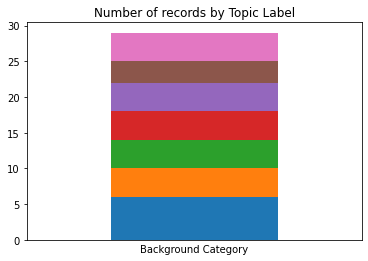

In [132]:
import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df2.assign(dummy = 1).groupby(
  ['dummy','Topic Label']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by Topic Label')

# other it'll show up as 'dummy' 
plt.xlabel('Background Category')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['Topic Label'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()


In [25]:
dummies4 = df2['Topic Label'].str.get_dummies()




In [26]:
dummies4.head()

,adventure,lucky,musical,pedigree,religion,survivor,tricky
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0


In [27]:
df = pd.read_excel('dnd-dataframe.xlsx', sheet_name=0, usecols=['name', 'weapons','herotype','spells'])
df.head(30)

,name,herotype,weapons,spells
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment"
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy
2,aem,Paladin,Greataxe,"Abjuration, Conjuration"
3,yaeks,Rogue,"club, battleaxe","Conjuration, Evocation, Transmutation"
4,jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy"
5,aez,Sorcerer,"club, light crossbow","Evocation, Enchantment"
6,sax,Bard,"light crossbow, battleaxe, Dagger, sling, club",Necromancy
7,eert,Bard,Greataxe,"Transmutation, Necromancy"
8,wuc,Sorcerer,"light crossbow, battleaxe",Necromancy
9,yac,Sorcerer,Greataxe,"Conjuration, Evocation, Transmutation"


In [29]:
genre_data = pd.concat([df, dummies4], axis=1).reindex(df.index)
genre_data.head()

,name,herotype,weapons,spells,adventure,lucky,musical,pedigree,religion,survivor,tricky
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment",0,0,0,0,0,0,1
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy,0,0,0,1,0,0,0
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",0,0,0,1,0,0,0
3,yaeks,Rogue,"club, battleaxe","Conjuration, Evocation, Transmutation",0,0,0,0,0,1,0
4,jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy",0,0,0,0,1,0,0


# Add the Topic Modeling to Start Hybrid Recommender Engine

In [41]:

dummies1 = genre_data['weapons'].str.get_dummies(sep=',')
dummies2 = genre_data['spells'].str.get_dummies(sep=',')
dummies3 = genre_data['herotype'].str.get_dummies(sep=',')

genre2_data = pd.concat([df, dummies1], axis=1)
genre2_data = pd.concat([df, dummies2], axis=1)
genre2_data = pd.concat([df, dummies3], axis=1)
genre2_data.head()

,name,herotype,weapons,spells,Bard,Druid,Paladin,Rogue,Sorcerer
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment",1,0,0,0,0
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy,0,0,0,0,1
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",0,0,1,0,0
3,yaeks,Rogue,"club, battleaxe","Conjuration, Evocation, Transmutation",0,0,0,1,0
4,jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy",0,1,0,0,0


In [44]:


userInput = [
            {'name':'Irv', 'rating':1}   #Their is no rating system is being used thus by default rating is set to 1
         ] 
inputname = pd.DataFrame(userInput)

inputId = df[df['name'].isin(inputname['name'].tolist())]

#Then merging it so we can get the name. It's implicitly merging spells it by name.
inputname = pd.merge(inputId, inputname)

#Dropping information we won't use from the input dataframe
inputname = inputname.drop('weapons',1).drop('spells',1).drop('herotype',1)

#Filtering out the names from the input
username = genre_data[genre_data['name'].isin(inputname['name'].tolist())]

#Resetting the index to avoid future issues
username = username.reset_index(drop=True)

#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = username.drop('name',1).drop('weapons',1).drop('spells',1).drop('herotype',1)

#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputname['rating'])

genreTable = genre_data.copy()
genreTable = genreTable.drop('name',1).drop('weapons',1).drop('spells',1).drop('herotype',1)


In [45]:

#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())

#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)

#df.loc[df.index.isin(recommendationTable_df.head(3).keys())] #adjust the value of 3 here

df.loc[recommendationTable_df.head(6).index, :]

,name,herotype,weapons,spells
28,Irv,Sorcerer,light crossbow,Conjuration
9,yac,Sorcerer,Greataxe,"Conjuration, Evocation, Transmutation"
5,aez,Sorcerer,"club, light crossbow","Evocation, Enchantment"
18,Traubon Durthane,Sorcerer,light crossbow,"Evocation, Transmutation, Necromancy"
8,wuc,Sorcerer,"light crossbow, battleaxe",Necromancy
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy


In [46]:
recommendationTable_df.head(6)

28    1.0
9     0.5
5     0.5
18    0.5
8     0.5
1     0.5
dtype: float64